# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-09 Stochastic Gradient Descent Method

PA 3-09에서는 data sample을 하나씩 사용하여 $\theta$를 학습시키는 Stochastic Gradient Descent Method(이하 SGDM)를 구현합니다.  
참고로 이 SGDM이 만들어질 때는 data sample을 하나씩 사용하는 방법으로 개발되었으나, parallel computing의 발전으로  
현재는 mini-batch를 사용할 때도 SGDM으로 표현하는 경우가 많습니다.

PA 3-09에서는 다음과 같이 2단계를 통해 SGDM에 대하여 with replacement, without replacement 2가지를 구현합니다.

<ul>
    <li> Step.1 SGDM without Replacement </li>
    <li> Step.1 SGDM with Replacement </li>
</ul>

먼저 다음 셀을 실행합니다.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)

그리고 PA 3-08 사용했던 것처럼 default dataset을 불러오고,  
SGDM은 data sample을 하나만 이용하기 때문에 PA 3-06의 model/loss implementation 코드를 복사/붙여넣기 해줍니다.

In [ ]:
##### Start Your Code(Dataset Preparation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Preparation) #####

##### Start Your Code(Model/Loss Implementation) #####
node1 = nodes.mul_node()
node2 = nodes.minus_node()
node3 = nodes.square_node()
node4 = nodes.mean_node()
##### End Your Code(Model/Loss Implementation) #####

***
## Step.1 SGDM without Replacement

replacement 없이 SGDM을 사용하면 dataset에 들어있는 data sample들을 하나씩 이용하게 됩니다.

따라서 다음과 같이 1개를 사용하면 다음 iteration에서 dataset에는 해당 data sample을 사용할 수 없습니다.
<img src='./imgs/3_09_01.png' width = 800>
<img src='./imgs/3_09_02.png' width = 800>

위의 과정은 단순히 for loop을 이용하여 data sample에 하나씩 접근함으로써 구현할 수 있습니다.  
이때 한 번의 epoch이 끝나면 random shuffle을 하여 data sample을 사용하는 cycle이 만들어지는 것을 방지합니다.

***
**Programming**  
for loop을 이용하여 다음과 같은 조건에서의 SGDM without replacement를 구현하세요.
- initial theta = 0.1
- learning rate = 0.01
- total epoch = 3

Text(0.5, 1.0, '$\\mathcal{L}$')

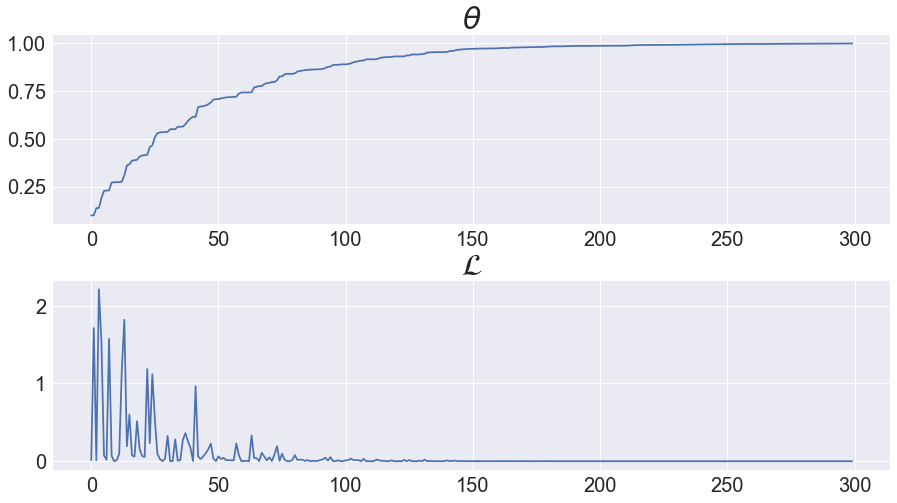

In [5]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for epoch in range(epochs):
    ##### Start Your Code(Random Shuffling) #####
    np.random.shuffle(dataset)
    ##### End Your Code(Random Shuffling) #####
    
    ##### Start Your Code(SGDM without Replacement) #####
    for data_sample in dataset:
        x, y = data_sample[1], data_sample[-1]
        
        z1 = node1.forward(th, x)
        z2 = node2.forward(y, z1)
        l = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th_list.append(th)
        loss_list.append(l)
        
        th = th - lr*dth
    ##### Start Your Code(SGDM without Replacement) #####

fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

***
## Step.2 SGDM with Replacement

data sample 하나를 사용하여 $\theta$를 update시키고 replacement를 해주는 SGDM의 진행은 다음과 같습니다.

<img src='./imgs/3_09_03.png' width = 800>
<img src='./imgs/3_09_04.png' width = 800>

즉, data sample 하나를 뽑아 $\theta$를 update 시켜도 다음 iteration에서도 동일한 data sample을 사용할 확률이 있습니다.

이때 without replacement와의 차이점은 for loop을 이용하여 data sample에 접근하지 않고,  
random sampling을 하여 data sample을 뽑아줍니다.  
따라서 epoch보단 iteration의 표현이 더 적절합니다.

***
**Programming**  
다음의 조건에서 replacement를 해주는 SGDM을 구현하세요.  
이때 idx에는 data index의 array를 할당하고, random choice를 이용하여 random_idx에 하나의 index를 sampling 해줍니다.  
- initial theta = 0.1
- learning rate = 0.01
- total iteration = 500

(Hint.1) np.arange()  
(Hint.2) np.random.choice()

Text(0.5, 1.0, '$\\mathcal{L}$')

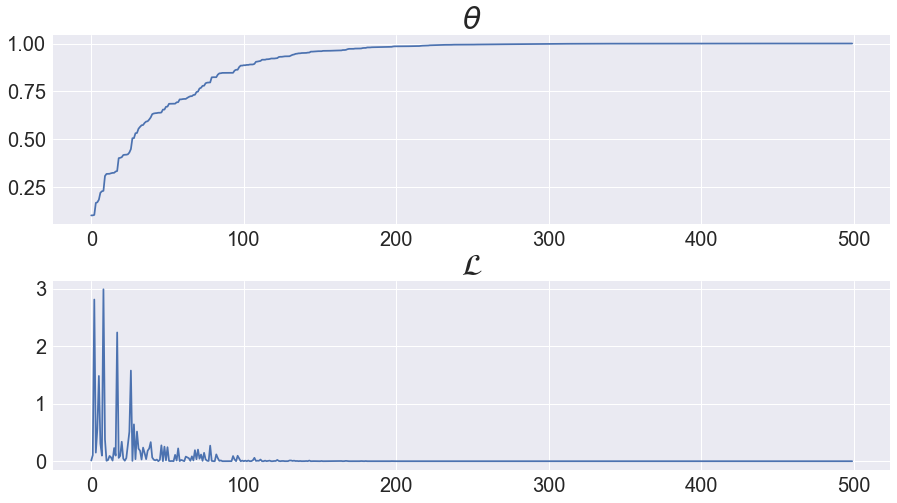

In [6]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
iterations = 500
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for itertaion in range(iterations):
    ##### Start Your Code(Random Sampling) #####
    idx = np.arange(dataset.shape[0])
    random_idx = np.random.choice(idx, size = (1))
    x, y = dataset[random_idx,1], dataset[random_idx,2]
    ##### End Your Code(Random Sampling) #####
    
    
    ##### Start Your Code(SGDM with Replacement) #####
    z1 = node1.forward(th, x)
    z2 = node2.forward(y, z1)
    l = node3.forward(z2)

    dz2 = node3.backward(1)
    dy, dz1 = node2.backward(dz2)
    dth, dx = node1.backward(dz1)

    th_list.append(th)
    loss_list.append(l)

    th = th - lr*dth
    ##### End Your Code(SGDM with Replacement) #####
    
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)